# Supplementary material for: 
# "MEASURING EMPLOYMENT IN THE CIRCULAR ECONOMY"

On this notebook we present an implementation of the 'cjobs' python module for the computation of **Circular Economy Jobs**.

The developed python module computes two sets of *multipliers*:

1. A circularity multiplier, defining the circularity potential of each economic sector and,


2. A material multiplier. This multiplier computes the material import dependency (MID) for each economic sector.

Both multipliers are used for the estimation of **Circular Economy Jobs** at a sector level.

# Used Libraries

## Load python libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load `cjobs` library

In [2]:
from cjobs.run import IOT
import cjobs; print('version:', cjobs.__version__)
import datetime; print('date:', datetime.datetime.now())

version: 1.2
date: 2020-07-21 01:06:41.888268


# 0. Create `IOT` object

We start by creating an `IOT` object. For the construction of this object, we define the path of the ExioBase data and a file containing the configuration parameter for the computations.

On this step, we simply load the ExioBase data and define basic configuration parameters. No computation is performed on this step.

In [3]:
myIOT = IOT('./data/exiobase/IOT_2016_ixi_data/', './config.json')

countries: BR - BE


# 1. Downscale IO tables to city level &
# 2. Compute MID

On the configuration file, we define a path pointing to a file containing employment data (used to downscale the IO table).

The downscaling function takes as input a single variable defining a dictionary to aggregate the economic sectors of ExioBase and inputted employment data.

In [4]:
myIOT.downscale_data('./data/agg.csv')

Compute MID
Compute Global MID
Compute Employment


/home/esteban/workspace/CE-Jobs/.env/lib/python3.6/site-packages/ipfn/ipfn.py:145: RuntimeWarning: invalid value encountered in double_scalars
  if abs(m_ijk / ori_ijk - 1) > max_conv:


This function calls three computation steps:
1. Computes Material Import Dependencies (MID)
2. Global MID
3. Compute Employment data from ExioBase (Not implemented on this paper)

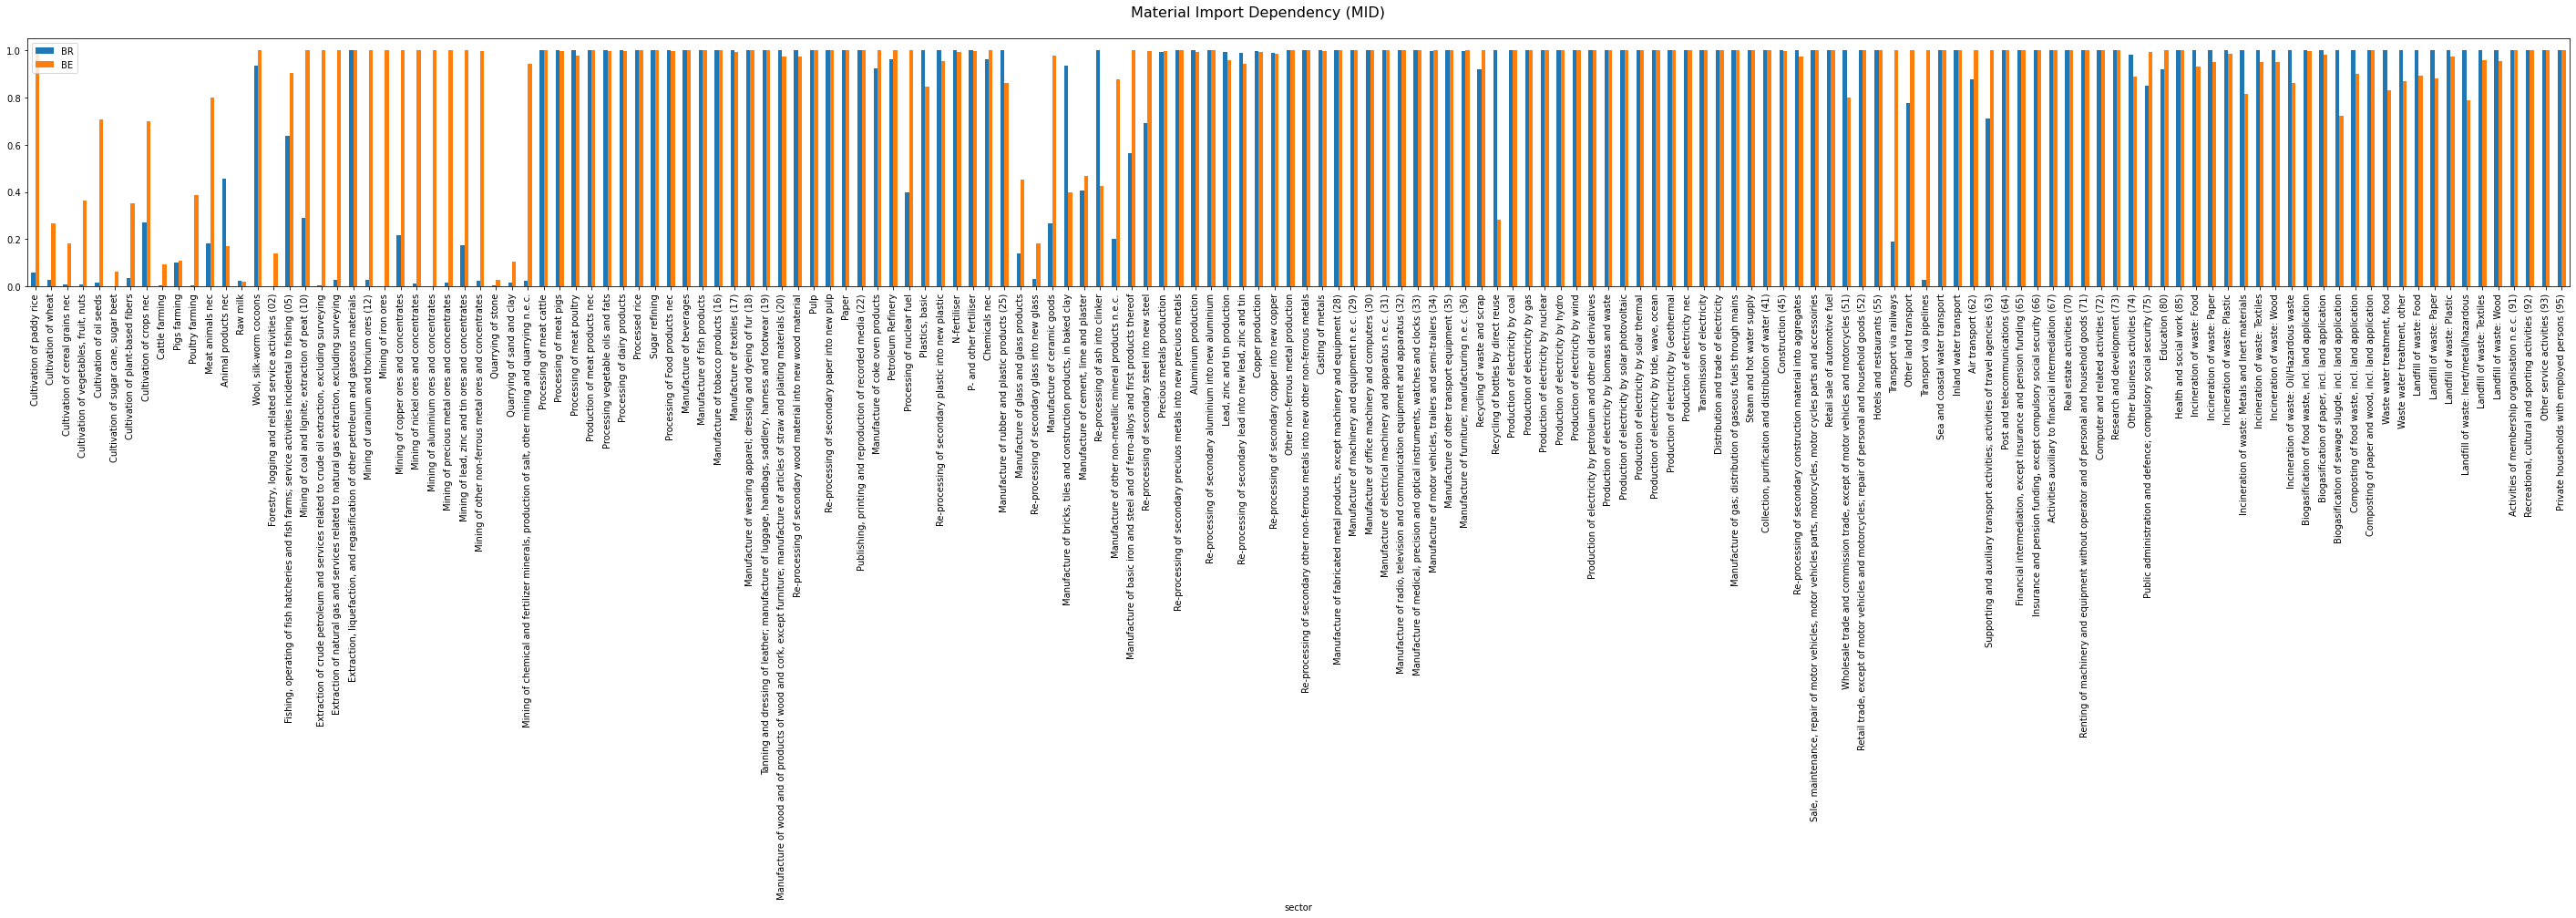

In [5]:
myIOT.IMP.to_excel('./output/material_id.xlsx')
myIOT.plot_mid(figsize=(50, 5))

# 3. Compute Circular Economy Multipliers 

In the last step, we compute the Circular Economy Multipliers. The function `compute_CE` takes as input two positional arguments:

1. `use_mat`Defines the use of MID for the computation of CE multipliers
2. `use_global` (forces `use_mat`) Uses MID compared to global average values. 

In [6]:
myIOT.compute_CE(use_mat=True, cap=1)

compute multipliers


# 4. Plot Results

## 4.1 Plot IO Tables and Multipliers

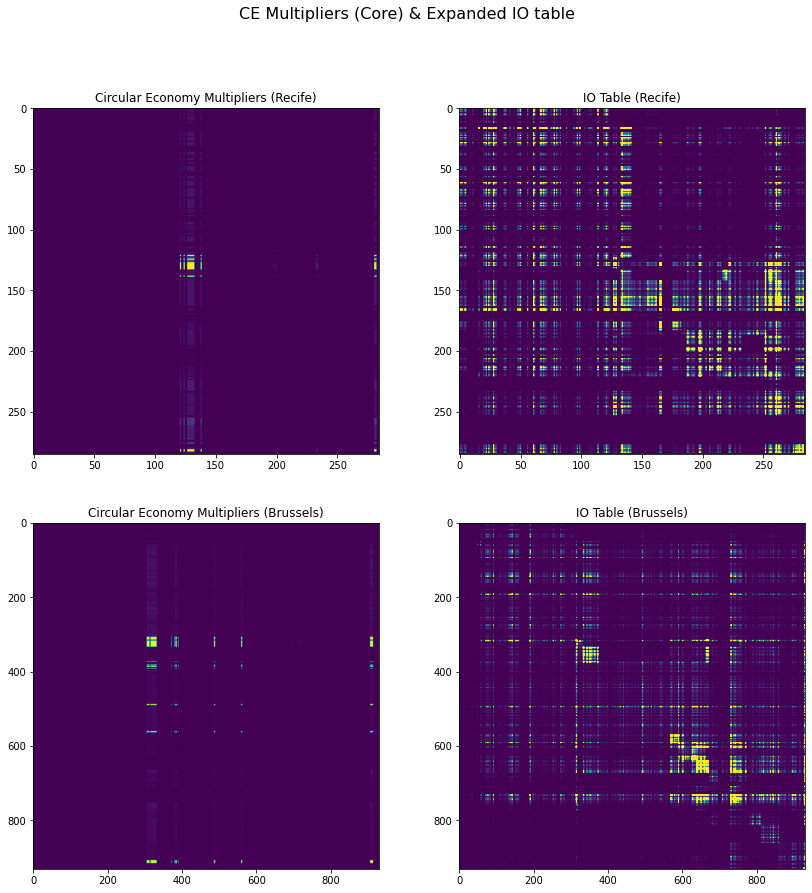

In [7]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
f.suptitle('CE Multipliers (Core) & Expanded IO table', fontsize=16)

ax1.imshow(myIOT.country_data['BR']['mulmat'], vmax=1, vmin=0)
ax1.set_title('Circular Economy Multipliers (Recife)');

ax2.imshow(myIOT.country_data['BR']['Z'], vmin=0, vmax=1)
ax2.set_title('IO Table (Recife)');

ax3.imshow(myIOT.country_data['BE']['mulmat'], vmax=1, vmin=0)
ax3.set_title('Circular Economy Multipliers (Brussels)');

ax4.imshow(myIOT.country_data['BE']['Z'], vmin=0, vmax=1)
ax4.set_title('IO Table (Brussels)');

## 4.2 CE-Jobs Shares by Economic Sector in Brussels

Top 10 Circular Economy Jobs economic sectors
--------------------------------------------------------------------------------
                                 description_english  share
0  Activities of extraterritorial organisations a...   0.13
1             Wireless telecommunications activities   0.11
2                     Civil  engineering  activities   0.07
3                    Computer consultancy activities   0.05
4    Data processing, hosting and related activities   0.04
5                      Placeholder: Renewable Energy   0.04
6             Water collection, treatment and supply   0.04
7  Activities of business and employers membershi...   0.03
8                    Computer programming activities   0.03
9                         Activities of trade unions   0.03
Top 10 Circular Economy Jobs economic sectors (only MID)
--------------------------------------------------------------------------------
                                 description_english  share
0  Activities o

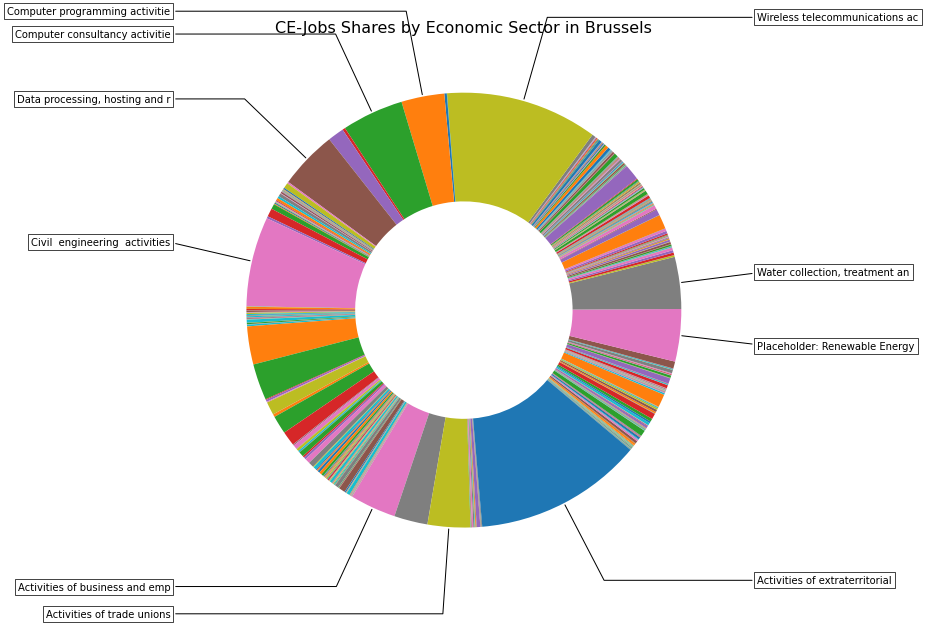

In [8]:
myIOT.print_pie('BE', title="CE-Jobs Shares by Economic Sector in Brussels")

## 4.3 CE-Jobs Shares by Economic Sector in Recife

Top 10 Circular Economy Jobs economic sectors
--------------------------------------------------------------------------------
                                 description_english  share
0                                        High school   0.07
1  Administration of the state and economic and s...   0.07
2                           Road passenger transport   0.06
3                             Road freight transport   0.05
4                                   Higher education   0.05
5  Architectural and engineering services and rel...   0.05
6  Early childhood education and elementary educa...   0.04
7      Activities of information technology services   0.04
8                           Hospital care activities   0.04
9       Water collection, treatment and distribution   0.03
Top 10 Circular Economy Jobs economic sectors (only MID)
--------------------------------------------------------------------------------
                                 description_english  share
0  Administrati

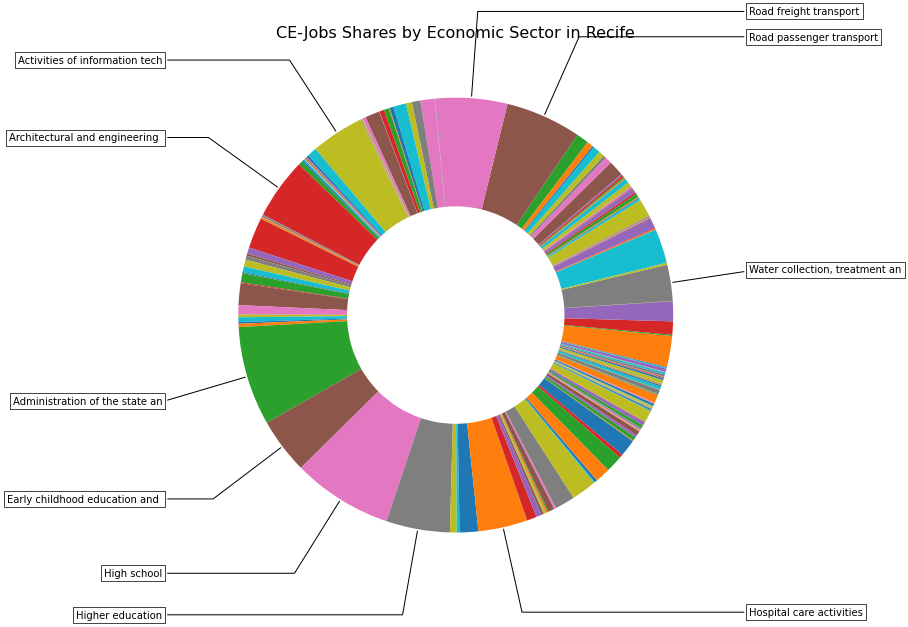

In [9]:
myIOT.print_pie('BR', title="CE-Jobs Shares by Economic Sector in Recife")

## 4.4 Recompute multipliers without MID

In [10]:
myIOT.downscale_data('./data/agg.csv')
myIOT.compute_CE(use_mat=False)

Compute MID
Compute Global MID
Compute Employment


/home/esteban/workspace/CE-Jobs/.env/lib/python3.6/site-packages/ipfn/ipfn.py:145: RuntimeWarning: invalid value encountered in double_scalars
  if abs(m_ijk / ori_ijk - 1) > max_conv:


compute multipliers


## 4.5 CE-Jobs Shares by Economic Sector in Brussels (NO MID)

Top 10 Circular Economy Jobs economic sectors
--------------------------------------------------------------------------------
                                 description_english  share
0             Wireless telecommunications activities   0.17
1                     Civil  engineering  activities   0.10
2                    Computer consultancy activities   0.07
3    Data processing, hosting and related activities   0.06
4                      Placeholder: Renewable Energy   0.06
5             Water collection, treatment and supply   0.05
6  Activities of business and employers membershi...   0.05
7                    Computer programming activities   0.05
8                         Activities of trade unions   0.05
9  Activities of professional membership organiza...   0.04
nmax: 2336
Summary by circularity type
--------------------------------------------------------------------------------
                  nr_jobs  total_circular_jobs nr_jobs_s total_circular_jobs_s
ntypequalifier

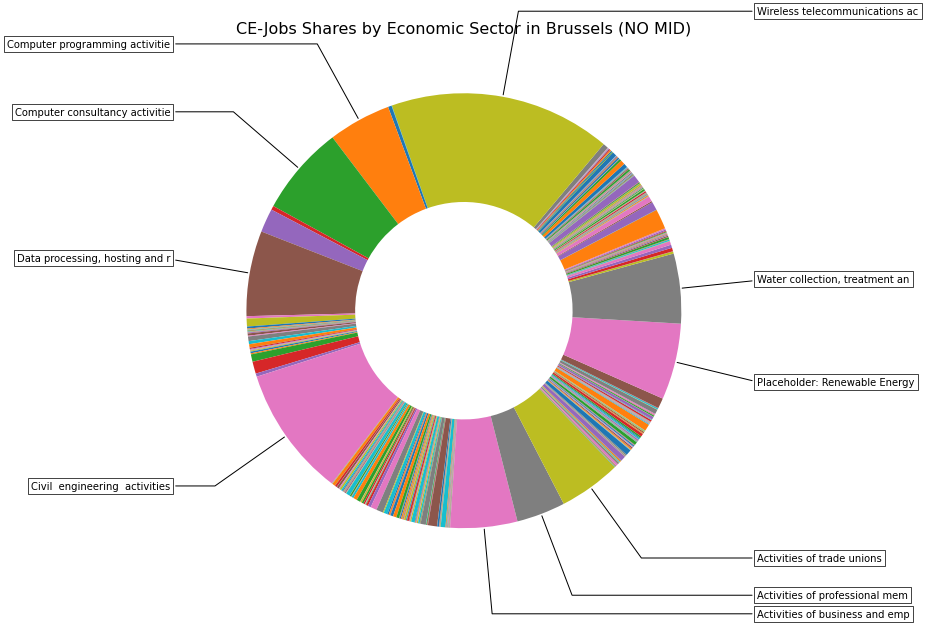

In [11]:
myIOT.print_pie('BE', title="CE-Jobs Shares by Economic Sector in Brussels (NO MID)")

## 4.6 CE-Jobs Shares by Economic Sector in Recife (NO MID)

Top 10 Circular Economy Jobs economic sectors
--------------------------------------------------------------------------------
                                 description_english  share
0                                        High school   0.07
1  Architectural and engineering services and rel...   0.07
2      Activities of information technology services   0.06
3                           Hospital care activities   0.05
4                                   Higher education   0.05
5  Early childhood education and elementary educa...   0.04
6       Water collection, treatment and distribution   0.04
7                                   Waste collection   0.04
8       Renting of means of transport without driver   0.03
9  Placeholder: Maintenance of machinery and equi...   0.03
nmax: 3142
Summary by circularity type
--------------------------------------------------------------------------------
                  nr_jobs  total_circular_jobs nr_jobs_s total_circular_jobs_s
ntypequalifier

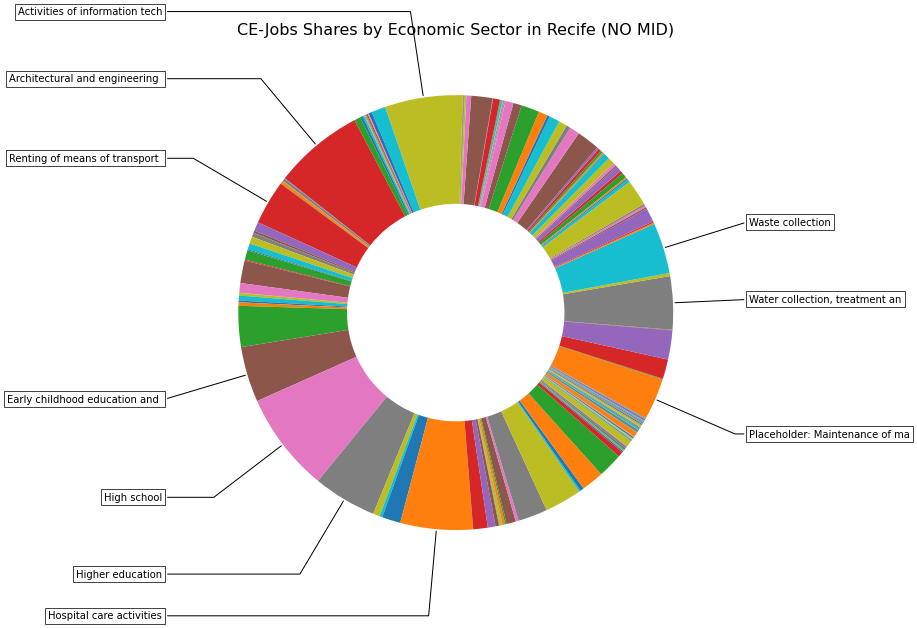

In [12]:
myIOT.print_pie('BR', title="CE-Jobs Shares by Economic Sector in Recife (NO MID)")

# Results

| indicator | **Brussels** | **Recife** |
| -- | -- | -- |
| **only MID** | 4.13% | 5.44% |
| **only CE** | 9.02% | 11.52% |
| **Avr.** | 6.57% | 8.48% |
| **Sum.** | 13.15% | 16.97% |